In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the database

In [31]:
df_meta = pd.read_csv('../datasets/raw/HT_Sensor_metadata.dat', delimiter='\t+')
df_meta.shape

(100, 5)

In [32]:
df_db = pd.read_csv('../datasets/raw/HT_Sensor_dataset.dat', delimiter='\s+')
df_db.shape

(928991, 12)

## Transforming database in an unique file with all information

In [33]:
df_db.set_index('id', inplace=True)
df_db = df_db.join(df_meta, how='inner')
df_db.set_index(np.arange(df_db.shape[0]), inplace=True)
df_db['time'] += df_db['t0']
# WE DO NOT WANT TO DROP t0 BECASUE IT IS THE MOMENT WHEN STIMULUS STARTS
#df_db.drop(['t0'], axis=1, inplace=True)
df_db.head()

,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity,id,date,class,t0,dt
0,12.490250,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528,0,07-04-15,banana,13.49,1.64
1,12.490528,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299,0,07-04-15,banana,13.49,1.64
2,12.490806,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093,0,07-04-15,banana,13.49,1.64
3,12.491084,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905,0,07-04-15,banana,13.49,1.64
4,12.491373,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736,0,07-04-15,banana,13.49,1.64


## Testing how to plot a series

Momento del comienzo del estimulo: 6.49
Momento final del estimulo: 7.21


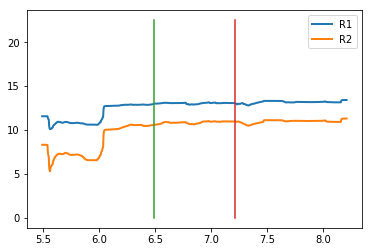

In [54]:
plt.plot(df_db.time[df_db.id==3], df_db.R1[df_db.id==3], linewidth = '2.0')
plt.plot(df_db.time[df_db.id==3], df_db.R2[df_db.id==3], linewidth = '2.0')
#plt.plot(df_db.time[df_db.id==3], df_db.R3[df_db.id==3], linewidth = '2.0')
#plt.plot(df_db.time[df_db.id==3], df_db.R4[df_db.id==3], linewidth = '2.0')
#plt.plot(df_db.time[df_db.id==3], df_db.R5[df_db.id==3], linewidth = '2.0')
#plt.plot(df_db.time[df_db.id==3], df_db.R6[df_db.id==3], linewidth = '2.0')
#plt.plot(df_db.time[df_db.id==3], df_db.R7[df_db.id==3], linewidth = '2.0')
#plt.plot(df_db.time[df_db.id==3], df_db.R8[df_db.id==3], linewidth = '2.0')

stim_start = df_db.t0[df_db.id==3].values[0]
stim_end = df_db.t0[df_db.id==3].values[0] + df_db.dt[df_db.id==3].values[0]
plt.plot([stim_start, stim_start], [0, 22.5])
plt.plot([stim_end, stim_end], [0, 22.5])

plt.legend()
print('Momento del comienzo del estimulo:', df_db.t0[df_db.id==3].values[0])
print('Momento final del estimulo:', df_db.t0[df_db.id==3].values[0]+df_db.dt[df_db.id==3].values[0])

## Testing how to plot all series of all sensors given an ID

Text(0.5, 0.98, 'Sensor Reading on Day 0')

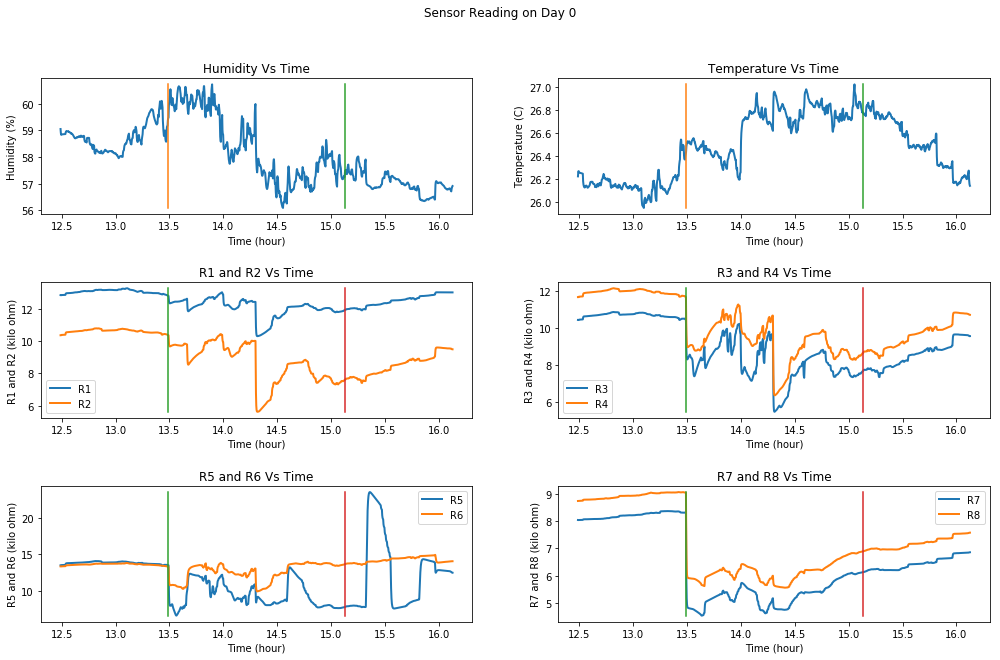

In [84]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(17)
fig.subplots_adjust(hspace=.5)

stim_start = df_db.t0[df_db.id==0].values[0]
stim_end = df_db.t0[df_db.id==0].values[0] + df_db.dt[df_db.id==0].values[0]

min_val = min(df_db.Humidity[df_db.id==0])
max_val = max(df_db.Humidity[df_db.id==0])
axes[0,0].plot(df_db.time[df_db.id==0], df_db.Humidity[df_db.id==0], linewidth = '2.0')
axes[0,0].plot([stim_start, stim_start], [min_val, max_val])
axes[0,0].plot([stim_end, stim_end], [min_val, max_val])
axes[0,0].set_title('Humidity Vs Time')
axes[0,0].set_xlabel('Time (hour)')
axes[0,0].set_ylabel('Humidity (%)')

min_val = min(df_db['Temp.'][df_db.id==0])
max_val = max(df_db['Temp.'][df_db.id==0])
axes[0,1].plot(df_db.time[df_db.id==0], df_db['Temp.'][df_db.id==0], linewidth = '2.0')
axes[0,1].plot([stim_start, stim_start], [min_val, max_val])
axes[0,1].plot([stim_end, stim_end], [min_val, max_val])
axes[0,1].set_title('Temperature Vs Time')
axes[0,1].set_xlabel('Time (hour)')
axes[0,1].set_ylabel('Temperature (C)')

min_val1 = min(df_db.R1[df_db.id==0])
min_val2 = min(df_db.R2[df_db.id==0])
min_val = min(min_val1, min_val2)
max_val1 = max(df_db.R1[df_db.id==0])
max_val2 = max(df_db.R2[df_db.id==0])
max_val = max(max_val1, max_val2)
axes[1,0].plot(df_db.time[df_db.id==0], df_db.R1[df_db.id==0], linewidth = '2.0')
axes[1,0].plot(df_db.time[df_db.id==0], df_db.R2[df_db.id==0], linewidth = '2.0')
axes[1,0].plot([stim_start, stim_start], [min_val, max_val])
axes[1,0].plot([stim_end, stim_end], [min_val, max_val])
axes[1,0].set_title('R1 and R2 Vs Time')
axes[1,0].set_xlabel('Time (hour)')
axes[1,0].set_ylabel('R1 and R2 (kilo ohm)')
axes[1,0].legend()

min_val1 = min(df_db.R3[df_db.id==0])
min_val2 = min(df_db.R4[df_db.id==0])
min_val = min(min_val1, min_val2)
max_val1 = max(df_db.R3[df_db.id==0])
max_val2 = max(df_db.R4[df_db.id==0])
max_val = max(max_val1, max_val2)
axes[1,1].plot(df_db.time[df_db.id==0], df_db.R3[df_db.id==0], linewidth = '2.0')
axes[1,1].plot(df_db.time[df_db.id==0], df_db.R4[df_db.id==0], linewidth = '2.0')
axes[1,1].plot([stim_start, stim_start], [min_val, max_val])
axes[1,1].plot([stim_end, stim_end], [min_val, max_val])
axes[1,1].set_title('R3 and R4 Vs Time')
axes[1,1].set_xlabel('Time (hour)')
axes[1,1].set_ylabel('R3 and R4 (kilo ohm)')
axes[1,1].legend()

min_val1 = min(df_db.R5[df_db.id==0])
min_val2 = min(df_db.R6[df_db.id==0])
min_val = min(min_val1, min_val2)
max_val1 = max(df_db.R5[df_db.id==0])
max_val2 = max(df_db.R6[df_db.id==0])
max_val = max(max_val1, max_val2)
axes[2,0].plot(df_db.time[df_db.id==0], df_db.R5[df_db.id==0], linewidth = '2.0')
axes[2,0].plot(df_db.time[df_db.id==0], df_db.R6[df_db.id==0], linewidth = '2.0')
axes[2,0].plot([stim_start, stim_start], [min_val, max_val])
axes[2,0].plot([stim_end, stim_end], [min_val, max_val])
axes[2,0].set_title('R5 and R6 Vs Time')
axes[2,0].set_xlabel('Time (hour)')
axes[2,0].set_ylabel('R5 and R6 (kilo ohm)')
axes[2,0].legend()

min_val1 = min(df_db.R7[df_db.id==0])
min_val2 = min(df_db.R8[df_db.id==0])
min_val = min(min_val1, min_val2)
max_val1 = max(df_db.R7[df_db.id==0])
max_val2 = max(df_db.R8[df_db.id==0])
max_val = max(max_val1, max_val2)
axes[2,1].plot(df_db.time[df_db.id==0], df_db.R7[df_db.id==0], linewidth = '2.0')
axes[2,1].plot(df_db.time[df_db.id==0], df_db.R8[df_db.id==0], linewidth = '2.0')
axes[2,1].plot([stim_start, stim_start], [min_val, max_val])
axes[2,1].plot([stim_end, stim_end], [min_val, max_val])
axes[2,1].set_title('R7 and R8 Vs Time')
axes[2,1].set_xlabel('Time (hour)')
axes[2,1].set_ylabel('R7 and R8 (kilo ohm)')
axes[2,1].legend()

plt.suptitle('Sensor Reading on Day 0')

## Creating a function to avoid repeating code

In [108]:
def plot_series(features_names, id, dataframe, axes, ox, oy, stim_start, stim_end):

    # Calculating minimum value
    min_val = dataframe[features_names[0]][dataframe.id==id].values[0]
    for feat_name in features_names:
        min_val_aux = min(dataframe[feat_name][dataframe.id==id])
        min_val = min(min_val, min_val_aux)

    # Calculating maximum value
    max_val = dataframe[features_names[0]][dataframe.id==id].values[0]
    for feat_name in features_names:
        max_val_aux = max(dataframe[feat_name][dataframe.id==id])
        max_val = max(max_val, max_val_aux)

    # Plotting features
    for feat_name in features_names:
        axes[ox,oy].plot(dataframe.time[dataframe.id==id], dataframe[feat_name][dataframe.id==id], linewidth = '2.0')
    
    # Plotting start and end of stimulus
    axes[ox,oy].plot([stim_start, stim_start], [min_val, max_val])
    axes[ox,oy].plot([stim_end, stim_end], [min_val, max_val])

    ylabel_str = features_names[0]
    for i in range(1, len(features_names)):
        ylabel_str += ' and '+features_names[i]
    
    xlabel_str = 'Time'
    axes[ox,oy].set_title(ylabel_str + ' VS ' + xlabel_str)
    axes[ox,oy].set_xlabel(xlabel_str)
    axes[ox,oy].set_ylabel(ylabel_str)
    axes[ox,oy].legend()



def plot_allSeries_byID(id, dataframe):
    # nrows values is set according to the project
    nrows = 3

    fig, axes = plt.subplots(nrows=nrows, ncols=2)
    fig.set_figheight(10)
    fig.set_figwidth(17)
    fig.subplots_adjust(hspace=.5)

    stim_start = dataframe.t0[dataframe.id==id].values[0]
    stim_end = dataframe.t0[dataframe.id==id].values[0] + dataframe.dt[dataframe.id==id].values[0]

    plot_series(['Humidity'], id, dataframe, axes, 0, 0, stim_start, stim_end)
    plot_series(['Temp.'], id, dataframe, axes, 0, 1, stim_start, stim_end)
    plot_series(['R1', 'R2'], id, dataframe, axes, 1, 0, stim_start, stim_end)
    plot_series(['R3', 'R4'], id, dataframe, axes, 1, 1, stim_start, stim_end)
    plot_series(['R5', 'R6'], id, dataframe, axes, 2, 0, stim_start, stim_end)
    plot_series(['R7', 'R8'], id, dataframe, axes, 2, 1, stim_start, stim_end)

    plt.suptitle('Sensor Reading on Day '+str(id))



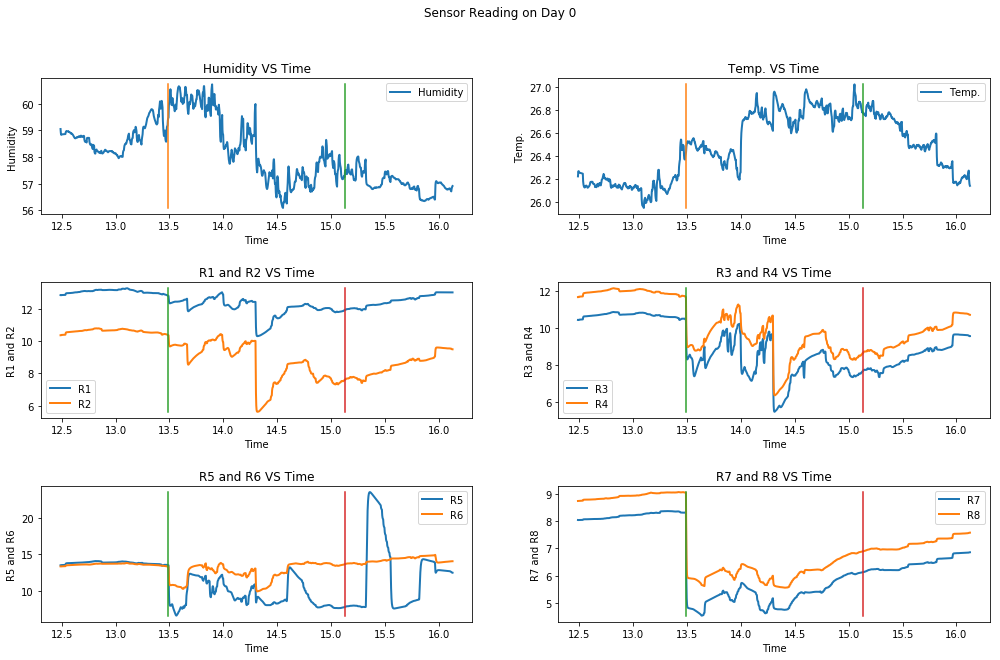

In [109]:
plot_allSeries_byID(0, df_db)

## Plotting a random sample

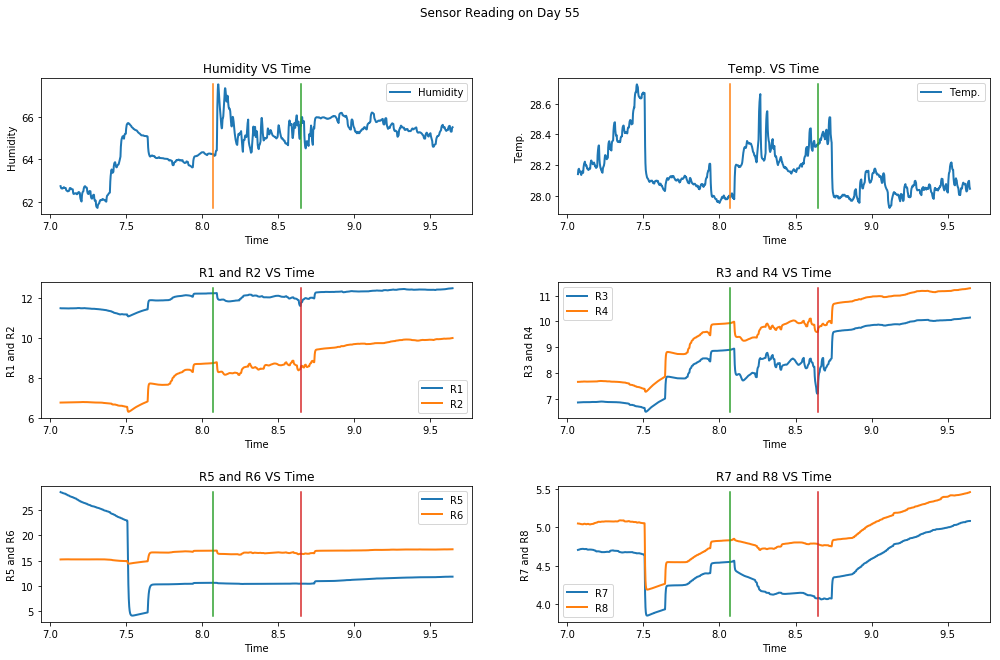

In [110]:
rand_id = np.random.randint(0, max(df_db.id))
plot_allSeries_byID(rand_id, df_db)